In [2]:
#Load Libraries

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [4]:
#Load Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [6]:
#Shape of the data
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [8]:
#Normalize data

x_train = x_train/255.0
x_test = x_test / 255.0

7


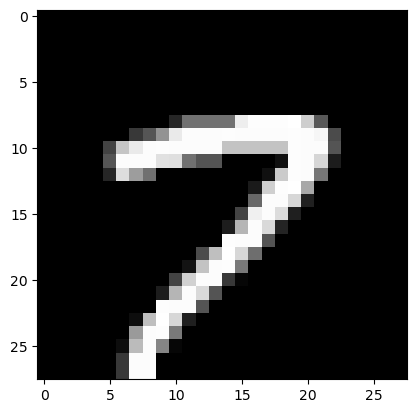

In [10]:
plt.imshow(x_train[123], cmap ='grey')
print(y_train[123])
plt.show()

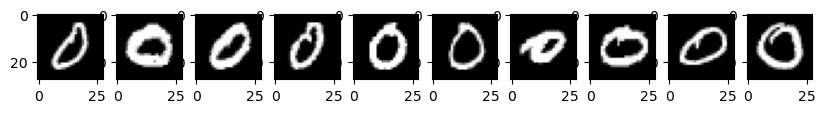

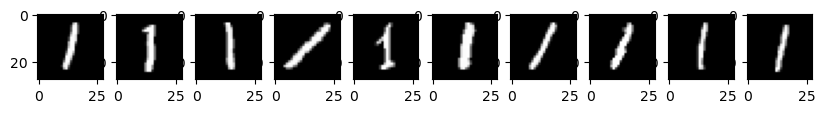

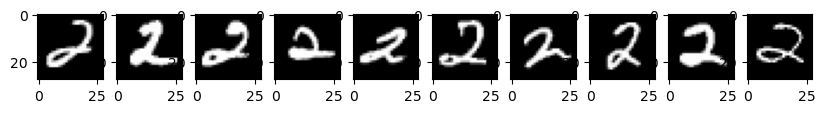

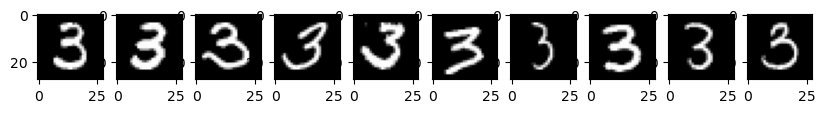

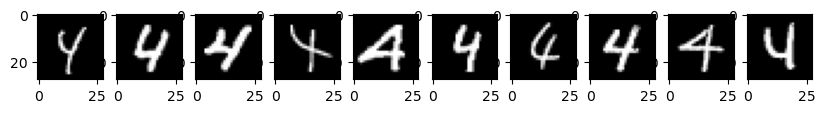

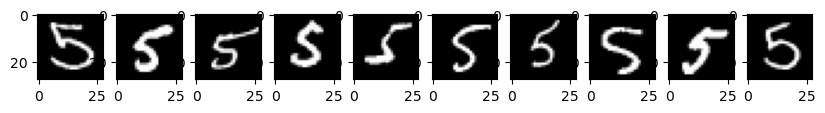

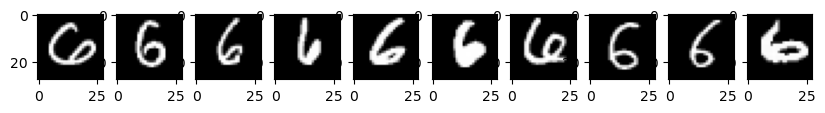

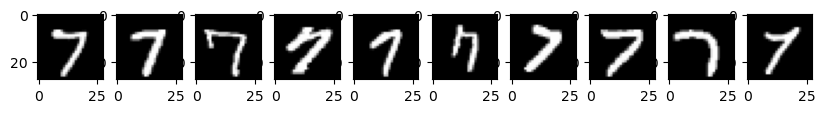

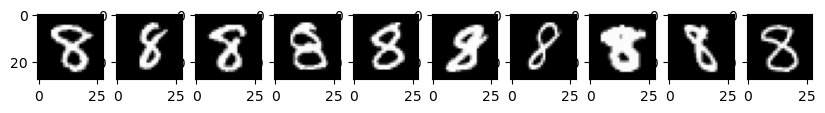

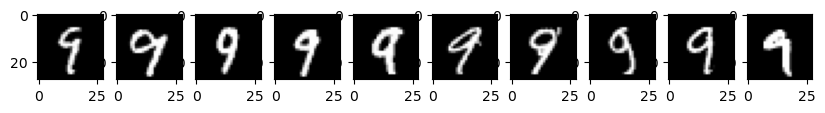

In [12]:
for num in range(0,10):

    index = np.random.choice(np.where( y_train == num)[0], 10)
    
    plt.figure(figsize = (10,10))
               
    for e, i in enumerate(index):
        plt.subplot(1,10,e+1)
        plt.imshow(x_train[i], cmap ='gray')
    plt.show()

In [14]:
y_train = tf.keras.utils.to_categorical(y_train)

In [18]:
#Delete earlier model to re-run
#del model

In [20]:
def model_func(hidden_layer1_neuron, hidden_layer2_neuron, x, y, epoch, batch_size, lr):

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input((28,28) , name= 'InputLayer'))
    model.add(tf.keras.layers.Flatten(name = 'FlatLayer'))
    model.add(tf.keras.layers.Dense(hidden_layer1_neuron, activation = tf.keras.activations.relu, name = 'HiddenLayer1'))
    model.add(tf.keras.layers.Dense(hidden_layer2_neuron, activation = tf.keras.activations.relu, name = 'HiddenLayer2'))
    model.add(tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax , name = 'OutputLayer'))

    model.compile(loss = tf.keras.losses.categorical_crossentropy,
              optimizer = tf.keras.optimizers.SGD(learning_rate = lr),
              metrics = ["acc"])

    model.fit( x = x_train,
              y = y_train,
              epochs = epoch,
              batch_size = batch_size,
              validation_split = 0.1)

    score = pd.DataFrame()
    score['val_loss'] = model.history.history['val_loss']
    score['loss'] = model.history.history['loss']
    score['acc'] = model.history.history['acc']
    score['val_acc'] = model.history.history['val_acc']

    plt.subplot(1, 2, 1)
    plt.figure( figsize = (5,5))
    plt.title('Acc vs Val Acc')
    plt.plot(model.history.history['acc'] , label = 'Acc' +str(batch_size))
    plt.plot(model.history.history['val_acc'] , label = 'Val Acc' +str(batch_size))
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.figure( figsize = (5,5))
    plt.title('Loss vs Val Loss')
    plt.plot(model.history.history['loss'] , label = 'Loss' +str(batch_size))
    plt.plot(model.history.history['val_loss'] , label = 'Val Loss' +str(batch_size))
    plt.legend()
  
    return(model, score)

In [22]:
#Run Model

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.5743 - loss: 1.4789 - val_acc: 0.9003 - val_loss: 0.3837
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.8833 - loss: 0.4198 - val_acc: 0.9223 - val_loss: 0.2792
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9049 - loss: 0.3323 - val_acc: 0.9312 - val_loss: 0.2425
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.9189 - loss: 0.2862 - val_acc: 0.9377 - val_loss: 0.2199
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.9264 - loss: 0.2623 - val_acc: 0.9428 - val_loss: 0.2036
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.9315 - loss: 0.2421 - val_acc: 0.9478 - val_loss: 0.1907
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.9367 - loss: 0.2235 - val_acc: 0.9505 - val_loss: 0.1792
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9401 - loss: 0.2083 - val_acc: 0.9550 - val_loss: 0.1679
Epoch 9/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - ac

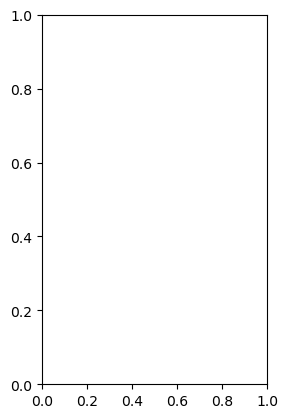

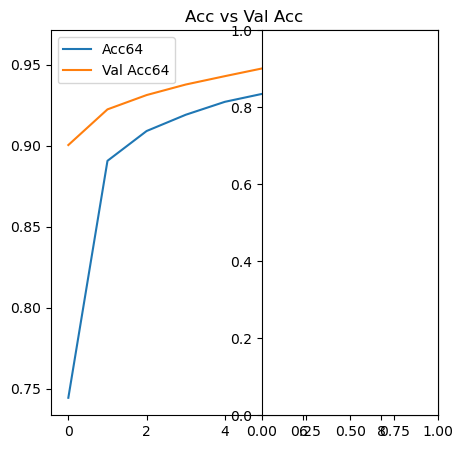

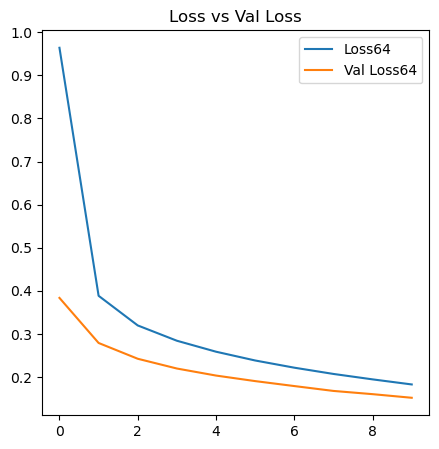

In [24]:
(model, score) = model_func(hidden_layer1_neuron =128, hidden_layer2_neuron = 32, x = x_train, y = y_train, epoch = 10, batch_size = 64, lr = 0.01)

In [26]:
score

,val_loss,loss,acc,val_acc
0,0.383705,0.963814,0.744407,0.900333
1,0.279180,0.388581,0.890593,0.922333
2,0.242542,0.319826,0.908982,0.931167
3,0.219919,0.284368,0.919019,0.937667
4,0.203600,0.258911,0.927000,0.942833
5,0.190739,0.238558,0.932148,0.947833
6,0.179238,0.221852,0.937370,0.950500
7,0.167944,0.207344,0.940481,0.955000
8,0.160458,0.194750,0.945000,0.957500
9,0.152066,0.182979,0.947815,0.960333


In [28]:
#Model Summary

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.5581 - loss: 1.4928 - val_acc: 0.8988 - val_loss: 0.4030
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.8789 - loss: 0.4383 - val_acc: 0.9218 - val_loss: 0.2874
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.9029 - loss: 0.3422 - val_acc: 0.9277 - val_loss: 0.2551
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9125 - loss: 0.3031 - val_acc: 0.9357 - val_loss: 0.2314
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.9204 - loss: 0.2788 - val_acc: 0.9408 - val_loss: 0.2144
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.9286 - loss: 0.2509 - val_acc: 0.9463 - val_loss: 0.2034
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.9325 - loss: 0.2376 - val_acc: 0.9478 - val_loss: 0.1905
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.9363 - loss: 0.2229 - val_acc: 0.9528 - val_loss: 0.1785
Epoch 9/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - ac

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ FlatLayer (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenLayer1 (Dense)            │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenLayer2 (Dense)            │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,940 (409.93 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

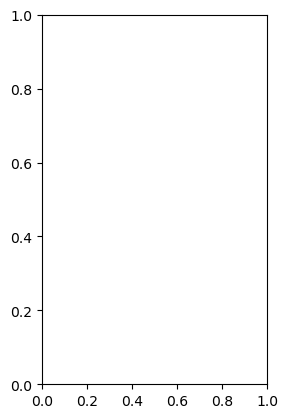

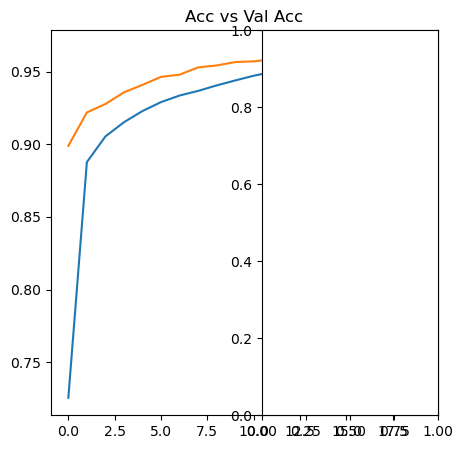

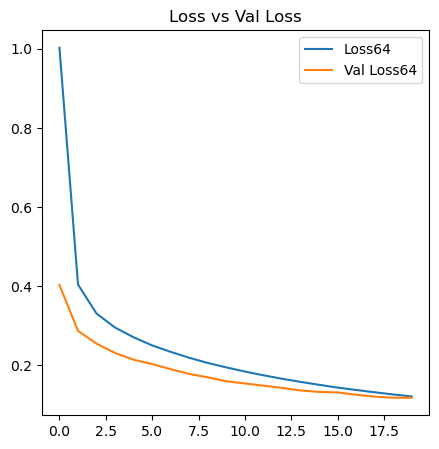

In [30]:
model_func(128, 32, x_train, y_train, 20, 64, 0.01)[0].summary()

In [31]:
#Delete earlier dictionary to re-run
#del model_dict

In [32]:
#Creating different dictionaries for different band size

Epoch 1/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - acc: 0.7333 - loss: 0.9253 - val_acc: 0.9333 - val_loss: 0.2276
Epoch 2/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - acc: 0.9237 - loss: 0.2648 - val_acc: 0.9520 - val_loss: 0.1703
Epoch 3/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - acc: 0.9452 - loss: 0.1922 - val_acc: 0.9588 - val_loss: 0.1442
Epoch 4/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - acc: 0.9529 - loss: 0.1609 - val_acc: 0.9655 - val_loss: 0.1242
Epoch 5/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - acc: 0.9619 - loss: 0.1330 - val_acc: 0.9687 - val_loss: 0.1103
Epoch 6/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - acc: 0.9650 - loss: 0.1184 - val_acc: 0.9700 - val_loss: 0.1039
Epoch 7/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - acc: 0.9708 - loss: 0.0985 - val_acc: 0.9710 - val_loss: 0.0984
Epoch 8/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - acc: 0.9737 - loss: 0.0885 - val_acc: 0.9745 - val_loss: 0.0898
Epoch 9/10
3375/3375 ━━━━━━━━━━━━

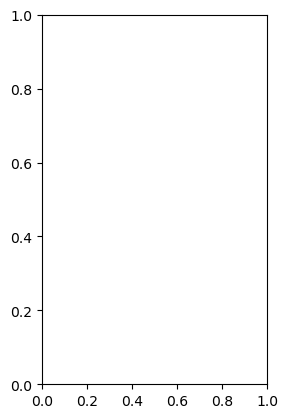

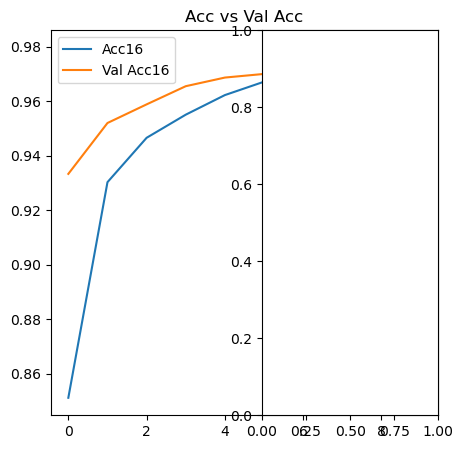

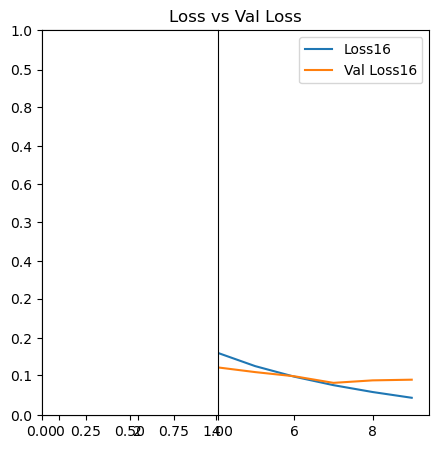

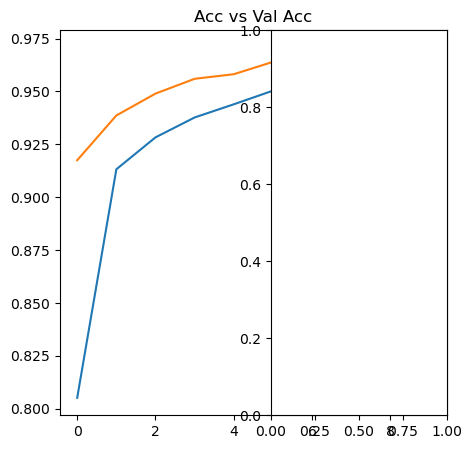

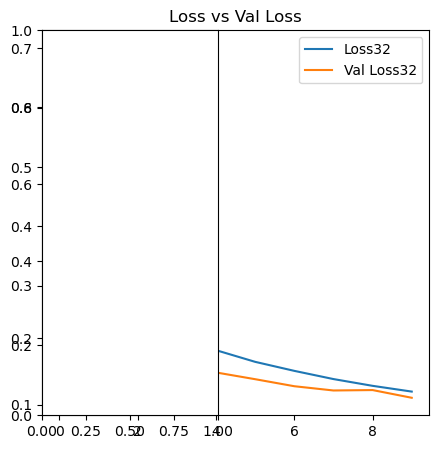

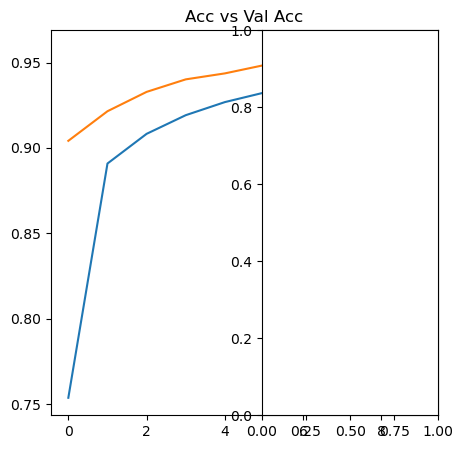

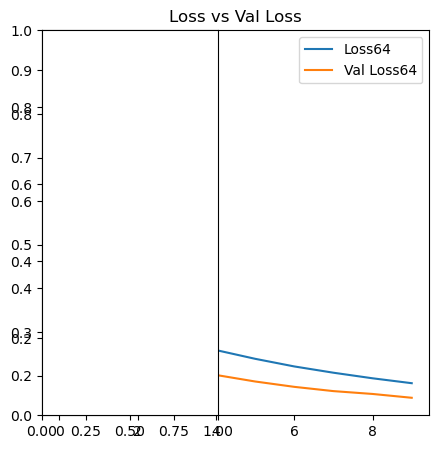

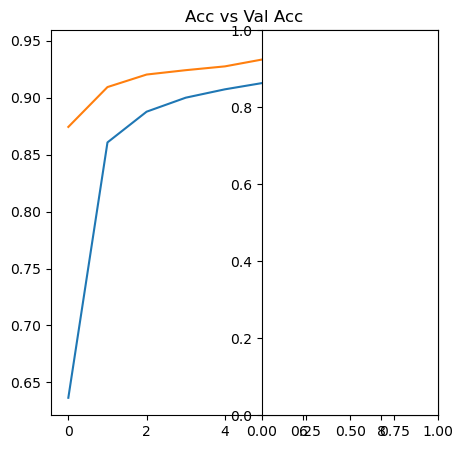

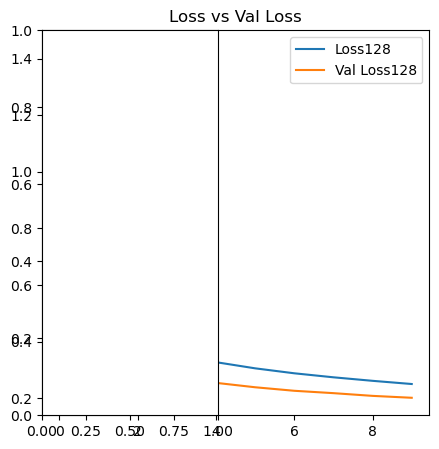

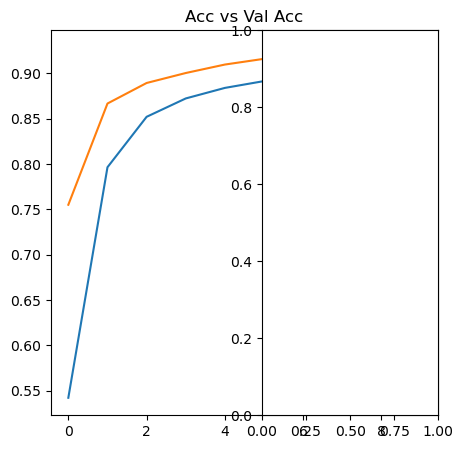

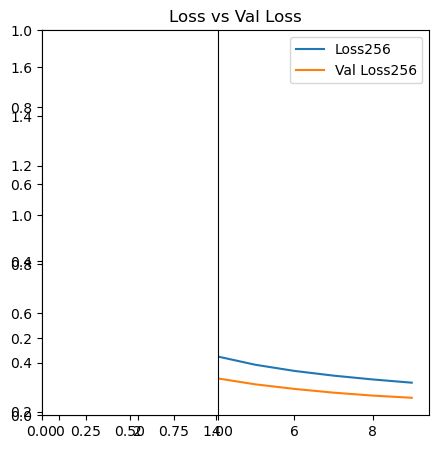

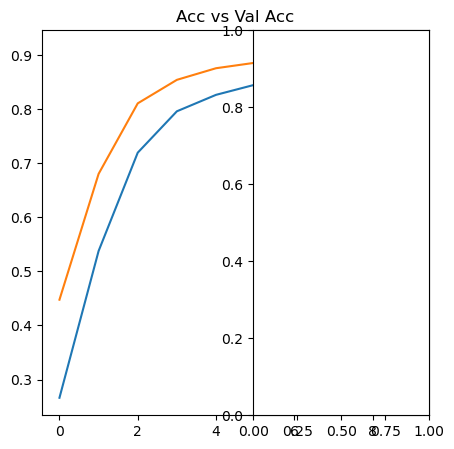

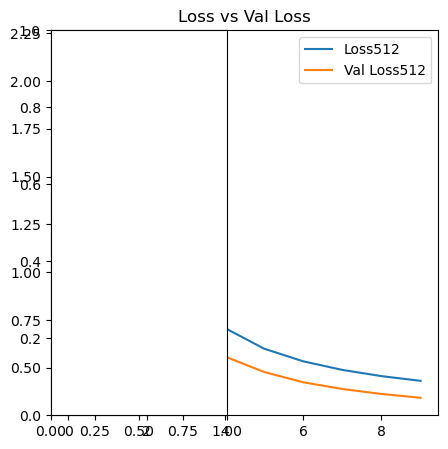

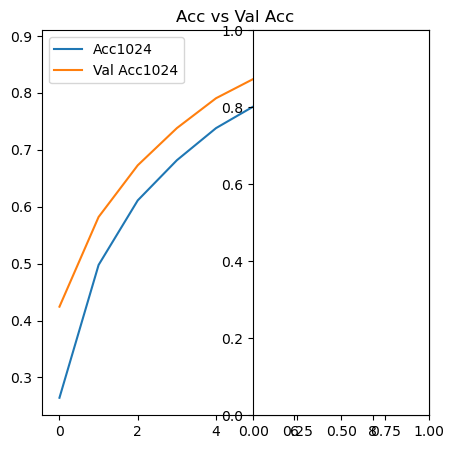

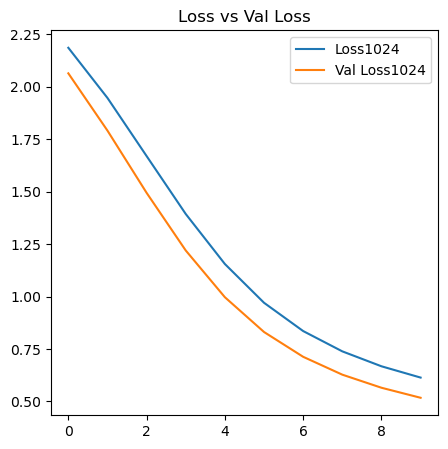

In [33]:
model_dict ={}

for bs in [16, 32, 64, 128, 256, 512, 1024]:
    model_dict[bs] = model_func(128, 32, x_train, y_train, 10, bs, 0.01)

In [34]:
model_dict[128][1]

,val_loss,loss,acc,val_acc
0,0.651203,1.438320,0.636500,0.874333
1,0.371693,0.552903,0.860741,0.909333
2,0.305135,0.410437,0.887722,0.920333
3,0.272543,0.357879,0.900019,0.924167
4,0.254014,0.327058,0.907352,0.927500
5,0.238385,0.305299,0.913130,0.933833
6,0.225943,0.287761,0.917907,0.937333
7,0.217580,0.273592,0.922389,0.938333
8,0.207959,0.261145,0.925852,0.942667
9,0.201236,0.249877,0.928426,0.943833


In [35]:
#Validation loss for different band size

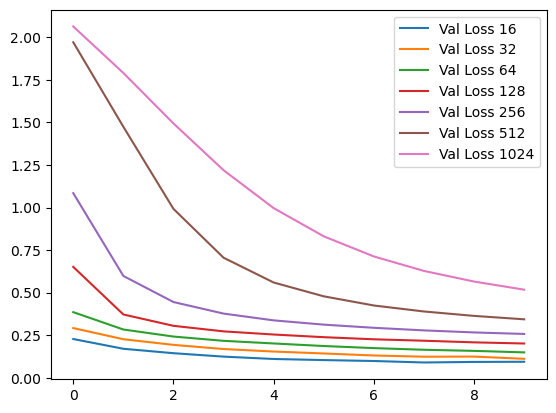

In [36]:
for bs in [16, 32, 64, 128, 256, 512, 1024]:
    plt.plot(model_dict[bs][1].val_loss, label = 'Val Loss ' +str(bs))
plt.legend(loc = 'upper right')
plt.show()

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
y_pred_probs = model.predict(x_test)         # probabilities
y_pred = np.argmax(y_pred_probs, axis=1)     # class with highest probability

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [44]:
# Class labels for Fashion MNIST
class_names = [
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'
]

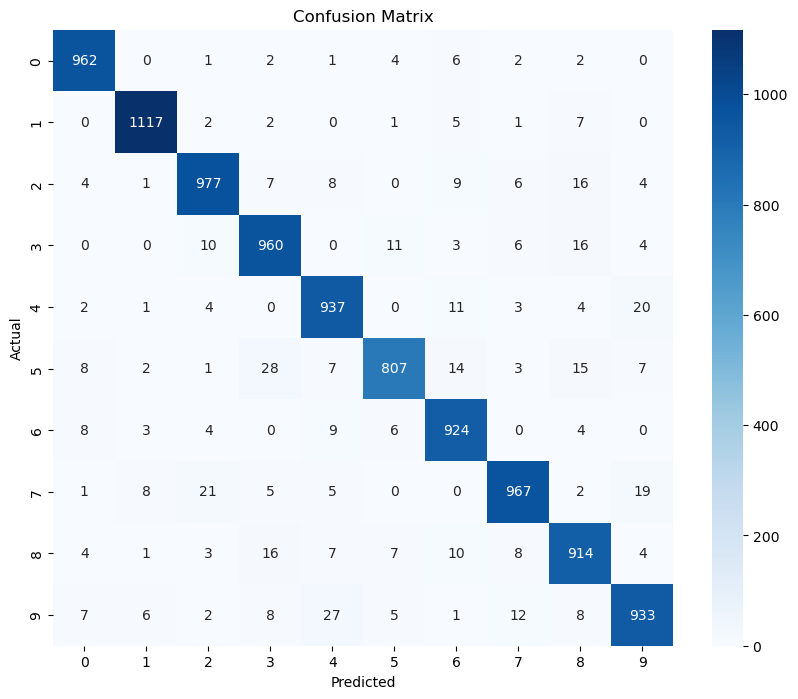

In [45]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [47]:
#Classification report

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))


Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.95      0.95      1032
           3       0.93      0.95      0.94      1010
           4       0.94      0.95      0.95       982
           5       0.96      0.90      0.93       892
           6       0.94      0.96      0.95       958
           7       0.96      0.94      0.95      1028
           8       0.93      0.94      0.93       974
           9       0.94      0.92      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

